In [2]:
# Let's start with a simple example of the scikit lib use

from sklearn import tree
from data_provider import decisionTreeMock

X = decisionTreeMock.get_data()
Y = decisionTreeMock.get_data_result()
print(X)
print(Y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

tree.plot_tree(clf.fit(X, Y))


[[0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1]]
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


[Text(248.0, 277.2, 'X[1] <= 0.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(124.0, 92.39999999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(372.0, 92.39999999999998, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

In [3]:
## Dataset
data_set = {
    'samples': X,
    'labels': Y
}

{'samples': [[0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1]], 'labels': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}


[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

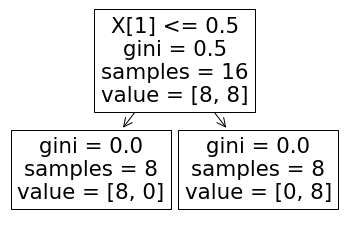

In [4]:
## Decision tree without privatization
print(data_set)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_set['samples'], data_set['labels'])

tree.plot_tree(clf.fit(data_set['samples'], data_set['labels']))

In [5]:
## Privatization
from privatizers import coinPrivatizer

private_format = []

for index, value in enumerate(data_set['samples']):
    single_list = []
    for num in value:
        single_list.append(False if num == 0 else True)
    single_list.append(False if data_set['labels'][index]==0 else True)
    private_format.append(single_list)

coin_privatizer = coinPrivatizer.CoinPrivatizer()
private_format = coin_privatizer.privatize(private_format)

private_data_set = {
    'samples': [],
    'labels': []
}

for value in private_format:
    private_data_set['labels'].append(1 if value.pop() else 0)
    single_list = []
    for v in value:
        single_list.append(1 if v else 0)
    private_data_set['samples'].append(single_list)


ModuleNotFoundError: No module named 'abstractPrivatizer'

In [ ]:
## Decision tree with privatization
print(private_data_set)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(private_data_set['samples'], private_data_set['labels'])

tree.plot_tree(clf.fit(private_data_set['samples'], private_data_set['labels']))